# QPG with parameter array $[[8, 4, 3, 24], [2, 0, 2; 0, 1; 1]]$

Consider a parameter set for a $4$-class association scheme $\mathcal{A} = (X, \mathcal{R} = \{R_0 = \operatorname{Id}_X, R_1, R_2, R_3, R_4\})$ with $40$ vertices with the intersection numbers $p^h_{ij}$ ($0 \le h, i, j \le 4$) given below. Such an association scheme was first constructed as a spherical code found by Smith and "beautified" by [Conway and Sloane](http://www.research.att.com/~njas/packings/) (see also [Ballinger et al.](https://doi.org/10.1080/10586458.2009.10129052)). [Bannai, Bannai and Bannai](https://doi.org/10.1016/j.ejc.2007.06.016) showed that this association scheme is uniquely determined by its parameters. Here, we present the computational details for a proof of uniqueness similar to theirs.

In [1]:
%display latex
import drg
from eigenspace import Eigenspace, VectorError, relmatrix

In [2]:
p = drg.ASParameters(p=list(zip(*
    [ [ [ 1, 0, 0, 0,  0 ], [ 0, 1, 0, 0,  0 ], [ 0, 0, 1, 0,  0 ], [ 0, 0, 0, 1,  0 ], [ 0, 0, 0, 0,  1 ] ], 
      [ [ 0, 8, 0, 0,  0 ], [ 1, 0, 1, 0,  6 ], [ 0, 2, 0, 0,  6 ], [ 0, 0, 0, 0,  8 ], [ 0, 2, 1, 1,  4 ] ], 
      [ [ 0, 0, 4, 0,  0 ], [ 0, 1, 0, 0,  3 ], [ 1, 0, 0, 3,  0 ], [ 0, 0, 4, 0,  0 ], [ 0, 1, 0, 0,  3 ] ], 
      [ [ 0, 0, 0, 3,  0 ], [ 0, 0, 0, 0,  3 ], [ 0, 0, 3, 0,  0 ], [ 1, 0, 0, 2,  0 ], [ 0, 1, 0, 0,  2 ] ], 
      [ [ 0, 0, 0, 0, 24 ], [ 0, 6, 3, 3, 12 ], [ 0, 6, 0, 0, 18 ], [ 0, 8, 0, 0, 16 ], [ 1, 4, 3, 2, 14 ] ] ]
)))
p.Q

[    1    20     5     4    10]
[    1     5     0    -1    -5]
[    1     0    -5     4     0]
[    1 -20/3     5     4 -10/3]
[    1  -5/3     0    -1   5/3]

The graph $\Gamma_1 = (X, R_1)$ is a quotient-polynomial graph with parameter array $[[8, 4, 3, 24], [2, 0, 2; 0, 1; 1]]$. From the intersection numbers and the dual eigenmatrix above, we can see that the association scheme $\mathcal{A}$ is imprimitive with imprimitivity set $\tilde{0} = \{0, 2, 3\}$ and dual imprimitivity set $\overline{0} = \{0, 3\}$. Note that we also have $\overline{1} = \{1, 4\}$ and $\overline{2} = \{2\}$. Let us examine the parameters of subschemes of $\mathcal{A}$ corresponding to $\tilde{0}$.

In [3]:
p23 = p.subset(2, 3)
p23.p

0: [1 0 0]
   [0 4 0]
   [0 0 3]

1: [0 1 0]
   [1 0 3]
   [0 3 0]

2: [0 0 1]
   [0 4 0]
   [1 0 2]

These parameters uniquely define the association scheme corresponding to the complete bipartite graph $K_{4,4}$. Let us also examine its dual eigenmatrix.

In [4]:
p23.Q

[ 1  6  1]
[ 1  0 -1]
[ 1 -2  1]

We will consider embeddings of subschemes of $\mathcal{A}$ corresponding to $\tilde{0}$ into its eigenspace $S_4$ of dimension $m_4 = 10$. Let us obtain the inner products (i.e., cosines of the angles) between unit vectors $u'_x$ for the vertices $x \in X$ corresponding to the relation they are in.

In [5]:
si = 4
m = p.Q[0, si]
angles, = zip(*(p.Q[:, si] / p.Q[0, si]))
angles

(1, -1/2, 0, -1/3, 1/6)

Since the graphs $\Gamma_2 = (X, R_2)$ and $\Gamma_3 = (X, R_3)$ are isomorphic to $5 K_{4,4}$ and $10 K_4$, respectively, we may consider a single $R_2$-biclique $X_1$ (i.e., the set of vertices of a connected component of $\Gamma_2$) and find the coefficients for the vectors $u'_x$ ($x \in X_1$).

In [6]:
S = Eigenspace(m, angles)
G11 = Graph(8)
G21 = graphs.CompleteBipartiteGraph(4, 4)
G31 = G21.complement()
R1 = relmatrix(G11, G21, G31)
S.vectors(R1)

[             1            (0)            (0)            (0)            (0)            (0)            (0)            (0)            (0)            (0)]
[          -1/3  2/3 * sqrt(2)            (0)            (0)            (0)            (0)            (0)            (0)            (0)            (0)]
[          -1/3 -1/3 * sqrt(2)  1/3 * sqrt(6)            (0)            (0)            (0)            (0)            (0)            (0)            (0)]
[          -1/3 -1/3 * sqrt(2) -1/3 * sqrt(6)            (0)            (0)            (0)            (0)            (0)            (0)            (0)]
[           (0)            (0)            (0)              1            (0)            (0)            (0)            (0)            (0)            (0)]
[           (0)            (0)            (0)           -1/3  2/3 * sqrt(2)            (0)            (0)            (0)            (0)            (0)]
[           (0)            (0)            (0)           -1/3 -1/3 * sqrt(2)  1/3 * sqrt(6)            (0)            (0)            (0)            (0)]
[           (0)            (0)            (0)           -1/3 -1/3 * sqrt(2) -1/3 * sqrt(6)            (0)            (0)            (0)            (0)]

Let us now consider two $R_2$-bicliques, say, $X_1$ and $X_2$, such that $X_\ell = X_{\ell 1} \cup X_{\ell 2}$ ($\ell = 1, 2$), where $X_{\ell r}$ ($1 \le \ell, r \le 2$) are $R_3$-cliques, and define $X^{(2)} = X_1 \cup X_2$. Since $p^1_{12} = p^4_{12} = 1$ and $1 + p^1_{13} = p^4_{13} = 1$, it follows that the graph $\Gamma^{(2)}_1 = (X^{(2)}, R_1|_{X^{(2)}})$ is a union of cycles of lengths divisible by $4$, with each vertex in $X_\ell$ having precisely one neighbour in each of $X_{\ell'1}$ and $X_{\ell'2}$ ($\{\ell, \ell'\} = \{1, 2\}$). The graph $\Gamma^{(2)}_1$ is therefore isomorphic to $C_{16}$, $C_{12} + C_4$, $2C_8$, $C_8 + 2C_4$, or $4C_4$. The choice of this graph thus uniquely determines the scheme $\mathcal{A}|_{X^{(2)}}$. Let us try to find the coefficients for the vectors $u'_x$ ($x \in X^{(2)}$) in each of these cases.

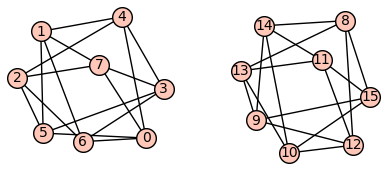

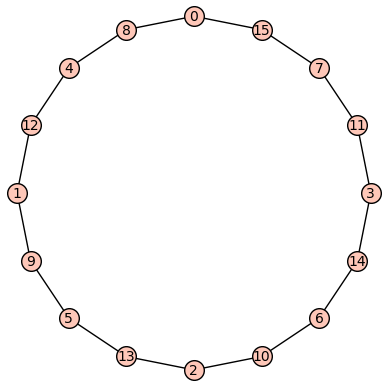

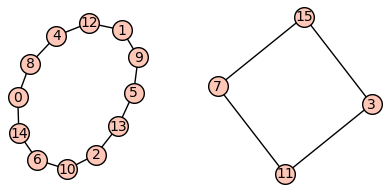

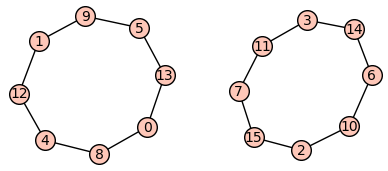

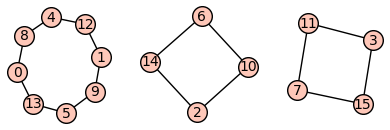

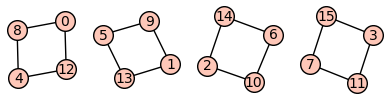

In [7]:
C = graphs.CycleGraph
K = graphs.CompleteGraph
G22 = 2 * graphs.CompleteBipartiteGraph(4, 4)
G32 = 4 * K(4)
G12s = [H.relabel([8*j+4*i+h for h in range(4) for i in range(2) for j in range(2)], inplace=False)
        for H in (C(16), C(12) + C(4), 2*C(8), C(8) + 2*C(4), 4*C(4))]
for H in (G22, *G12s):
    H.show()

In [8]:
R2s = [relmatrix(G12, G22, G32, vcs=G22.vertices()) for G12 in G12s]
d = {}
for i, R in enumerate(R2s):
    try:
        d[i] = S.vectors(R)
        print(f"Graph {i}: found embedding!")
    except VectorError as ex:
        print(f"Graph {i}: {ex} (row {ex.row}, diff {ex.diff})")
len(d)

Graph 0: The norm of the obtained vector is smaller than one! (row 13, diff 1/4)
Graph 1: The norm of the obtained vector is smaller than one! (row 13, diff 1/4)
Graph 2: The norm of the obtained vector is smaller than one! (row 14, diff 1/3)
Graph 3: found embedding!
Graph 4: found embedding!


2

We see that the scheme $\mathcal{A}|_{X^{(2)}}$ only admits an embedding into $S_4$ if $\Gamma^{(2)}_1$ is isomorphic to $C_8 + 2C_4$ or $4C_4$. We will thus consider these two cases. Let us examine the matrices of the coefficients for the vectors $u'_x$ ($x \in X^{(2)}$) in each of the two cases.

In [9]:
d

{3: [             1            (0)            (0)            (0)            (0)            (0)            (0)            (0)            (0)            (0)]
 [          -1/3  2/3 * sqrt(2)            (0)            (0)            (0)            (0)            (0)            (0)            (0)            (0)]
 [          -1/3 -1/3 * sqrt(2)  1/3 * sqrt(6)            (0)            (0)            (0)            (0)            (0)            (0)            (0)]
 [          -1/3 -1/3 * sqrt(2) -1/3 * sqrt(6)            (0)            (0)            (0)            (0)            (0)            (0)            (0)]
 [           (0)            (0)            (0)              1            (0)            (0)            (0)            (0)            (0)            (0)]
 [           (0)            (0)            (0)           -1/3  2/3 * sqrt(2)            (0)            (0)            (0)            (0)            (0)]
 [           (0)            (0)            (0)           -1/3 -1/3 * sqrt(2)  1/3 * sqrt(6)            (0)            (0)            (0)            (0)]
 [           (0)            (0)            (0)           -1/3 -1/3 * sqrt(2) -1/3 * sqrt(6)            (0)            (0)            (0)            (0)]
 [          -1/2            (0)            (0)           -1/2            (0)            (0)  1/2 * sqrt(2)            (0)            (0)            (0)]
 [           1/6 -1/3 * sqrt(2)            (0)            1/6 -1/3 * sqrt(2)            (0) -1/6 * sqrt(2)            2/3            (0)            (0)]
 [           1/6  1/6 * sqrt(2) -1/6 * sqrt(6)            1/6  1/6 * sqrt(2) -1/6 * sqrt(6) -1/6 * sqrt(2)           -1/3  1/3 * sqrt(3)            (0)]
 [           1/6  1/6 * sqrt(2)  1/6 * sqrt(6)            1/6  1/6 * sqrt(2)  1/6 * sqrt(6) -1/6 * sqrt(2)           -1/3 -1/3 * sqrt(3)            (0)]
 [           1/6 -1/3 * sqrt(2)            (0)           -1/2            (0)            (0) -1/6 * sqrt(2)           -1/3            (0)  1/3 * sqrt(3)]
 [          -1/2            (0)            (0)            1/6 -1/3 * sqrt(2)            (0) -1/6 * sqrt(2)           -1/3            (0) -1/3 * sqrt(3)]
 [           1/6  1/6 * sqrt(2) -1/6 * sqrt(6)            1/6  1/6 * sqrt(2) -1/6 * sqrt(6)  1/6 * sqrt(2)            1/3 -1/3 * sqrt(3)            (0)]
 [           1/6  1/6 * sqrt(2)  1/6 * sqrt(6)            1/6  1/6 * sqrt(2)  1/6 * sqrt(6)  1/6 * sqrt(2)            1/3  1/3 * sqrt(3)            (0)],
 4: [             1            (0)            (0)            (0)            (0)            (0)            (0)            (0)            (0)            (0)]
 [          -1/3  2/3 * sqrt(2)            (0)            (0)            (0)            (0)            (0)            (0)            (0)            (0)]
 [          -1/3 -1/3 * sqrt(2)  1/3 * sqrt(6)            (0)            (0)            (0)            (0)            (0)            (0)            (0)]
 [          -1/3 -1/3 * sqrt(2) -1/3 * sqrt(6)            (0)            (0)            (0)            (0)            (0)            (0)            (0)]
 [           (0)            (0)            (0)              1            (0)            (0)            (0)            (0)            (0)            (0)]
 [           (0)            (0)            (0)           -1/3  2/3 * sqrt(2)            (0)            (0)            (0)            (0)            (0)]
 [           (0)            (0)            (0)           -1/3 -1/3 * sqrt(2)  1/3 * sqrt(6)            (0)            (0)            (0)            (0)]
 [           (0)            (0)            (0)           -1/3 -1/3 * sqrt(2) -1/3 * sqrt(6)            (0)            (0)            (0)            (0)]
 [          -1/2            (0)            (0)           -1/2            (0)            (0)  1/2 * sqrt(2)            (0)            (0)            (0)]
 [           1/6 -1/3 * sqrt(2)            (0)            1/6 -1/3 * sqrt(2)            (0) -1/6 * sqrt(2)            2/3            (0)            (0)]
 [           1/

We will try to determine the coefficients for the vectors $u'_y$ for the remaining vertices $y \in X \setminus X^{(2)}$. Since $p^1_{11} = 0$, $p^2_{11} = p^4_{11} = 2$ and $p^3_{11} = 0$, the graph $\Gamma_1$ has no triangles, and each pair of vertices at distance $2$ has precisely two common neighbours (i.e., $\Gamma_1$ is amply regular with parameters $(n, k, \lambda, \mu) = (40, 8, 0, 2)$). This implies that $y$ has at most one neighbour in each $4$-cycle of $\Gamma^{(2)}_1$. Also, $y$ has precisely one neighbour from each of the $R_3$-cliques $X_{\ell r}$ ($1 \le \ell, r \le 2$).

If $\Gamma^{(2)}_1 \cong C_{8} + 2C_6$, this gives us three possibilities: either $y$ has one neighbour in one of the $4$-cycles and three neighbours in the $8$-cycle at mutual distances $2, 3, 3$, or it has one neighbour in each of the $4$-cycles and two in the $8$-cycle at distance $2$ or $3$. Since the matrix of the coefficients for the vectors $u'_x$ ($x \in X^{(2)}$) has full column rank, the orthonormal basis in which these vectors are expressed is uniquely determined, allowing us to attempt to find the unit vectors $u'_y$ for each of the three possibilities.

In [10]:
for adj in [(0, 4, 9, 14), (0, 4, 10, 15), (0, 6, 9, 15)]:
    try:
        v = S.vector(d[3], [1 if i in adj else 4 for i in range(16)])
        display((adj, v, sum(x^2 for x in v)))
    except VectorError as ex:
        print(f"{adj}: {ex} (row {ex.row}, diff {ex.diff})")

(0, 4, 9, 14): Cannot obtain the specified inner products! (row 13, diff -2/3)


((0, 4, 10, 15),
 (-1/2, (0), (0), -1/2, (0), (0), -1/3 * sqrt(2), 1/3, -1/3 * sqrt(3), (0)),
 7/6)

((0, 6, 9, 15),
 (-1/2, (0), (0), 1/6, 1/6 * sqrt(2), -1/6 * sqrt(6), (0), -1/2, -1/6 * sqrt(3), 1/6 * sqrt(3)),
 11/12)

We see that none of these cases give a unit vector. We therefore conclude that $\Gamma^{(2)}_1$ is not isomorphic to $C_8 + 2C_4$.

We are thus left with the case $\Gamma^{(2)}_1 \cong 4C_4$. In this case, $y$ must be adjacent to one vertex from each of the four $4$-cycles. We note that the matrix of the coefficients for the vectors $u'_x$ ($x \in X^{(2)}$) has rank one less than the full column rank, so we may attempt to add a vertex $y_0 \in X \setminus X^{(2)}$ to obtain a matrix with full column rank.

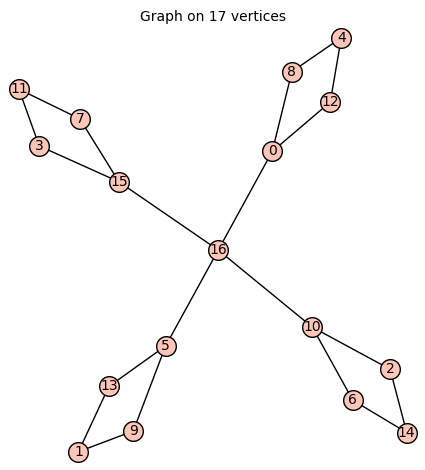

In [11]:
G2a = 2 * graphs.CompleteBipartiteGraph(4, 4) + K(1)
G3a = 4 * graphs.CompleteGraph(4) + K(1)
G1a = Graph([*G12s[4].edges(labels=False), (0, 16), (5, 16), (10, 16), (15, 16)])
G1a

In [12]:
Ra = relmatrix(G1a, G2a, G3a, vcs=G2a.vertices())
Va = S.vectors(Ra)
Va

[             1            (0)            (0)            (0)            (0)            (0)            (0)            (0)            (0)            (0)]
[          -1/3  2/3 * sqrt(2)            (0)            (0)            (0)            (0)            (0)            (0)            (0)            (0)]
[          -1/3 -1/3 * sqrt(2)  1/3 * sqrt(6)            (0)            (0)            (0)            (0)            (0)            (0)            (0)]
[          -1/3 -1/3 * sqrt(2) -1/3 * sqrt(6)            (0)            (0)            (0)            (0)            (0)            (0)            (0)]
[           (0)            (0)            (0)              1            (0)            (0)            (0)            (0)            (0)            (0)]
[           (0)            (0)            (0)           -1/3  2/3 * sqrt(2)            (0)            (0)            (0)            (0)            (0)]
[           (0)            (0)            (0)           -1/3 -1/3 * sqrt(2)  1/3 * sqrt(6)            (0)            (0)            (0)            (0)]
[           (0)            (0)            (0)           -1/3 -1/3 * sqrt(2) -1/3 * sqrt(6)            (0)            (0)            (0)            (0)]
[          -1/2            (0)            (0)           -1/2            (0)            (0)  1/2 * sqrt(2)            (0)            (0)            (0)]
[           1/6 -1/3 * sqrt(2)            (0)            1/6 -1/3 * sqrt(2)            (0) -1/6 * sqrt(2)            2/3            (0)            (0)]
[           1/6  1/6 * sqrt(2) -1/6 * sqrt(6)            1/6  1/6 * sqrt(2) -1/6 * sqrt(6) -1/6 * sqrt(2)           -1/3  1/3 * sqrt(3)            (0)]
[           1/6  1/6 * sqrt(2)  1/6 * sqrt(6)            1/6  1/6 * sqrt(2)  1/6 * sqrt(6) -1/6 * sqrt(2)           -1/3 -1/3 * sqrt(3)            (0)]
[          -1/2            (0)            (0)           -1/2            (0)            (0) -1/2 * sqrt(2)            (0)            (0)            (0)]
[           1/6 -1/3 * sqrt(2)            (0)            1/6 -1/3 * sqrt(2)            (0)  1/6 * sqrt(2)           -2/3            (0)            (0)]
[           1/6  1/6 * sqrt(2) -1/6 * sqrt(6)            1/6  1/6 * sqrt(2) -1/6 * sqrt(6)  1/6 * sqrt(2)            1/3 -1/3 * sqrt(3)            (0)]
[           1/6  1/6 * sqrt(2)  1/6 * sqrt(6)            1/6  1/6 * sqrt(2)  1/6 * sqrt(6)  1/6 * sqrt(2)            1/3  1/3 * sqrt(3)            (0)]
[          -1/2            (0)            (0)            1/6 -1/3 * sqrt(2)            (0)            (0)            (0) -1/3 * sqrt(3)  1/6 * sqrt(6)]

We may now look for unit vectors $u'_y$ corresponding to the remaining $23$ vertices $y$, taking into account that $(y_0, y) \in R_i$ for some $i \in \{1, 2, 3, 4\}$.

In [13]:
vs = []
for perm in Permutations([0, 1, 2, 3]):
    ii = [4*i+j for i, j in enumerate(perm)]
    r = [1 if h in ii else 4 for h in range(16)]
    for k in (1, 2, 3, 4):
        try:
            v = S.vector(Va, [*r, k])
            if v.norm() == 1:
                vs.append(v)
        except VectorError:
            pass
len(vs)

27

We find $27$ vectors, which exceeds the number of missing vertices by $4$. Let us build a graph with these vectors as its vertices, with two vectors being adjacent when their inner product takes one of the expected values.

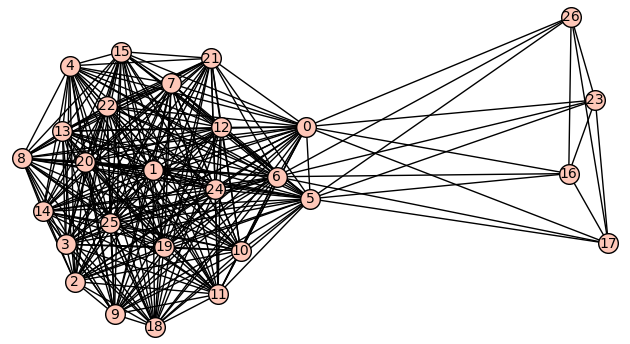

In [14]:
Gr = Graph([range(len(vs)), lambda i, j: i != j and vs[i] * vs[j] in angles])
Gr.plot()

We notice that the obtained graph has four vertices of degree $6$. Let us verify that the remaining $23$ vertices form a clique.

In [15]:
cl, = Gr.cliques_maximum()
len(cl)

23

We will now compute a matrix of inner products of all pairs of vectors and derive the relation matrix from it.

In [16]:
V = block_matrix([[Va], [Matrix(vs)[cl, :]]])
A = V * V.transpose()
R = A.apply_map(angles.index)
R

40 x 40 dense matrix over Integer Ring (use the '.str()' method to see the entries)

Let us verify that the above relation matrix corresponds to an association scheme with the intersection numbers of $\mathcal{A}$.

In [17]:
all(t.count((i, j)) == p.p[R[u][v], i, j] for u, v in Combinations(R.nrows(), 2)
    for t in [tuple(zip(R[u], R[v]))] for i in range(5) for j in range(5))

True

We thus see that there is, up to isomorphism, **precisely one** association scheme with the parameters given above.

Let us take a look at the graph $\Gamma_1 = (X, R_1)$.

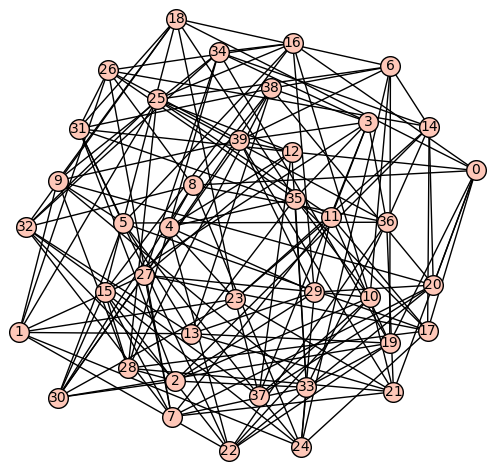

In [18]:
G1 = Graph([range(R.nrows()), lambda i, j: i != j and R[i][j] == 1])
G1.plot()

We find that the graph $\Gamma_1$ is isomorphic to [Graph 50831](https://houseofgraphs.org/graphs/50831) from the [House of Graphs](https://houseofgraphs.org/) database.

In [19]:
H = Graph('gsaCCA??????E?GGGG?K?WC_GgWaGoEQOAcgOa_@CK??MO?@Q_G@H_OCIAAI@__SCIGAGHD?OP_O`GIOGaGOIPAAGCcH?PAGQCW?c_ca_CBCGQ?_DCOK?OD@COI?I_IGD?C')
H.is_isomorphic(G1)

True